# CMP-701A Introduction to Python for Data Science
## 002 Coursework Project

In [74]:
# Start by importing our modules
import xarray as xr

import pandas as pd
import numpy as np
from scipy import stats

# import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [75]:
# Load the historical model output dataset
ds_hist = xr.open_mfdataset('../shared-datasets/thetao_hist/*.nc')

# load the future model output data set
ds_fut = xr.open_mfdataset('../shared-datasets/thetao_fut/*.nc')

t_hist = ds_hist.thetao
t_fut = ds_fut.thetao

In [76]:
### HIDDEN SOLUTION
t_hist_slice = t_hist.sel(time=slice('1950','2000'), lon=slice(260,360), lat=slice(10, 60))
t_hist_2p5m = t_hist_slice.sel(lev=2.5)
t_hist_2500m = t_hist_slice.sel(lev=2500)

t_fut_slice = t_fut.sel(time=slice('2050','2100'), lon=slice(260, 360), lat=slice(10, 60))
t_fut_2p5m = t_fut_slice.sel(lev=2.5)
t_fut_2500m = t_fut_slice.sel(lev=2500)
### END HIDDEN SOLUTION

In [77]:
t_hist_2p5m

<xarray.DataArray 'thetao' (time: 612, lat: 50, lon: 100)> Size: 12MB
dask.array<getitem, shape=(612, 50, 100), dtype=float32, chunksize=(12, 50, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 400B 10.5 11.5 12.5 13.5 14.5 ... 56.5 57.5 58.5 59.5
    lev      float64 8B 2.5
  * lon      (lon) float64 800B 260.5 261.5 262.5 263.5 ... 357.5 358.5 359.5
  * time     (time) datetime64[ns] 5kB 1950-01-15 1950-02-15 ... 2000-12-15
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [78]:
t_hist_2500m

<xarray.DataArray 'thetao' (time: 612, lat: 50, lon: 100)> Size: 12MB
dask.array<getitem, shape=(612, 50, 100), dtype=float32, chunksize=(12, 50, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 400B 10.5 11.5 12.5 13.5 14.5 ... 56.5 57.5 58.5 59.5
    lev      float64 8B 2.5e+03
  * lon      (lon) float64 800B 260.5 261.5 262.5 263.5 ... 357.5 358.5 359.5
  * time     (time) datetime64[ns] 5kB 1950-01-15 1950-02-15 ... 2000-12-15
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [79]:
t_fut_2p5m

<xarray.DataArray 'thetao' (time: 612, lat: 50, lon: 100)> Size: 12MB
dask.array<getitem, shape=(612, 50, 100), dtype=float32, chunksize=(12, 50, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 400B 10.5 11.5 12.5 13.5 14.5 ... 56.5 57.5 58.5 59.5
    lev      float64 8B 2.5
  * lon      (lon) float64 800B 260.5 261.5 262.5 263.5 ... 357.5 358.5 359.5
  * time     (time) datetime64[ns] 5kB 2050-01-15 2050-02-15 ... 2100-12-15
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [80]:
t_fut_2500m

<xarray.DataArray 'thetao' (time: 612, lat: 50, lon: 100)> Size: 12MB
dask.array<getitem, shape=(612, 50, 100), dtype=float32, chunksize=(12, 50, 100), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 400B 10.5 11.5 12.5 13.5 14.5 ... 56.5 57.5 58.5 59.5
    lev      float64 8B 2.5e+03
  * lon      (lon) float64 800B 260.5 261.5 262.5 263.5 ... 357.5 358.5 359.5
  * time     (time) datetime64[ns] 5kB 2050-01-15 2050-02-15 ... 2100-12-15
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [81]:
%pwd

'/home/jupyter-ahy24ueu/CMP7010A_002'

In [82]:
# Just run this cell
# t_hist_2p5m.to_netcdf('t_hist_2p5m.nc')
# t_hist_2500m.to_netcdf('t_hist_2500m.nc')
# t_fut_2p5m.to_netcdf('t_fut_2p5m.nc')
# t_fut_2500m.to_netcdf('t_fut_2500m.nc')

In [83]:
t_hist_2p5m = xr.open_dataset('t_hist_2p5m.nc').thetao
t_hist_2500m = xr.open_dataset('t_hist_2500m.nc').thetao

t_fut_2p5m = xr.open_dataset('t_fut_2p5m.nc').thetao
t_fut_2500m = xr.open_dataset('t_fut_2500m.nc').thetao

In [84]:
t_hist_2p5m

<xarray.DataArray 'thetao' (time: 372, lat: 70, lon: 150)> Size: 16MB
[3906000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 560B 0.5 1.5 2.5 3.5 4.5 ... 65.5 66.5 67.5 68.5 69.5
    lev      float64 8B ...
  * lon      (lon) float64 1kB 150.5 151.5 152.5 153.5 ... 297.5 298.5 299.5
  * time     (time) datetime64[ns] 3kB 1970-01-15 1970-02-15 ... 2000-12-15
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

---

## Let's start our coursework
## Task 1:
**Calculate the spatially-weighted average temperature for each level and period. Using this, compare and contrast**
- (A) calculate and plot the difference in the average temperature for each month of the year between the two periods and compare that with the variability in the temperature for each month of the year; 
- (B) calculate the difference in time-mean temperature and make a figure comparing this to the year-to-year variability in each period.

In [87]:
# Calculate latitude-based weights
weights = np.cos(np.deg2rad(t_hist_2p5m['lat']))
weights /= weights.mean()  # Normalize weights


### A) Calculate and plot the monthly temperature difference and variability between two periods.

**1) Firstly, Calculate spatially weighted means:**

In [88]:
# For surface level at (2.5m)
sfc_1950_2000 = t_hist_2p5m.weighted(weights).mean(dim=('lon', 'lat'))
deep_1950_2000 = t_hist_2500m.weighted(weights).mean(dim=('lon', 'lat'))
# For the deep level at (2500m)
sfc_2050_2100 = t_fut_2p5m.weighted(weights).mean(dim=('lon', 'lat'))
deep_2050_2100 = t_fut_2500m.weighted(weights).mean(dim=('lon', 'lat'))

**2) Secondly, Calculate monthly means and differences:**

In [89]:
# Calculate average temperature for each month
# For surface level
sfc_monthly_1950_2000 = sfc_1950_2000.groupby('time.month').mean(dim='time') # Group data by month
sfc_monthly_2050_2100 = sfc_2050_2100.groupby('time.month').mean(dim='time')
# For the deep level
deep_monthly_1950_2000 = deep_1950_2000.groupby('time.month').mean(dim='time')
deep_monthly_2050_2100 = deep_2050_2100.groupby('time.month').mean(dim='time')

In [90]:
# Then, Calculate differences between historical and future averages for each month (future - historical)
sfc_diff = sfc_monthly_2050_2100 - sfc_monthly_1950_2000
deep_diff = deep_monthly_2050_2100 - deep_monthly_1950_2000



**3) After, Check results:**

In [91]:
print("Surface monthly differences:", sfc_diff.values)
print("Deep monthly differences:", deep_diff.values)

Surface monthly differences: [3.2600876  3.1289472  3.06926862 3.1550091  3.39069075 3.82811238
 4.13566996 4.33023647 4.33165215 4.11259377 3.82154352 3.51218032]
Deep monthly differences: [0.08789727 0.08803323 0.08805157 0.08806565 0.08808488 0.08803676
 0.0880138  0.08805312 0.08807954 0.08814412 0.08832659 0.08849391]


**3) After, Compute monthly variability**

**4) Last, make a visualization for time-mean comparison using bar plot:**

In [ ]:
# Step 4: Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns, shared figure size

# Surface Plot (2.5m)
axes[0].plot(sfc_diff['month'], sfc_diff, label='Surface (2.5m)', color='blue')
axes[0].set_title('Monthly Surface Temperature Differences (2.5m)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature Difference (°C)')
axes[0].legend()
axes[0].grid()

# Deep Plot (2500m)
axes[1].plot(deep_diff['month'], deep_diff, label='Deep (2500m)', color='red')
axes[1].set_title('Monthly Deep Temperature Differences (2500m)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature Difference (°C)')
axes[1].legend()
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

### B) Calculate the difference in time-mean temperature and make a figure comparing this to the year-to-year variability in each period

**1) First, Group by month and calculate mean** 

In [92]:
# Step 1: Time-mean temperature for each period (use already calculated spatial means)
sfc_mean_hist = sfc_1950_2000.mean(dim='time')  # Time-mean for historical surface
deep_mean_hist = deep_1950_2000.mean(dim='time')  # Time-mean for historical deep
sfc_mean_fut = sfc_2050_2100.mean(dim='time')  # Time-mean for future surface
deep_mean_fut = deep_2050_2100.mean(dim='time')  # Time-mean for future deep

**2) Last, make a visualization for annual cycle comparison using line plot:**

In [93]:
# Step 2: Calculate the difference in time-mean temperature
sfc_diff_mean = sfc_mean_fut - sfc_mean_hist
deep_diff_mean = deep_mean_fut - deep_mean_hist

In [94]:
# Step 3: Year-to-year variability (standard deviation of annual means)
sfc_var_hist_annual = sfc_1950_2000.groupby('time.year').mean(dim='time').std(dim='year')
deep_var_hist_annual = deep_1950_2000.groupby('time.year').mean(dim='time').std(dim='year')

sfc_var_fut_annual = sfc_2050_2100.groupby('time.year').mean(dim='time').std(dim='year')
deep_var_fut_annual = deep_2050_2100.groupby('time.year').mean(dim='time').std(dim='year')

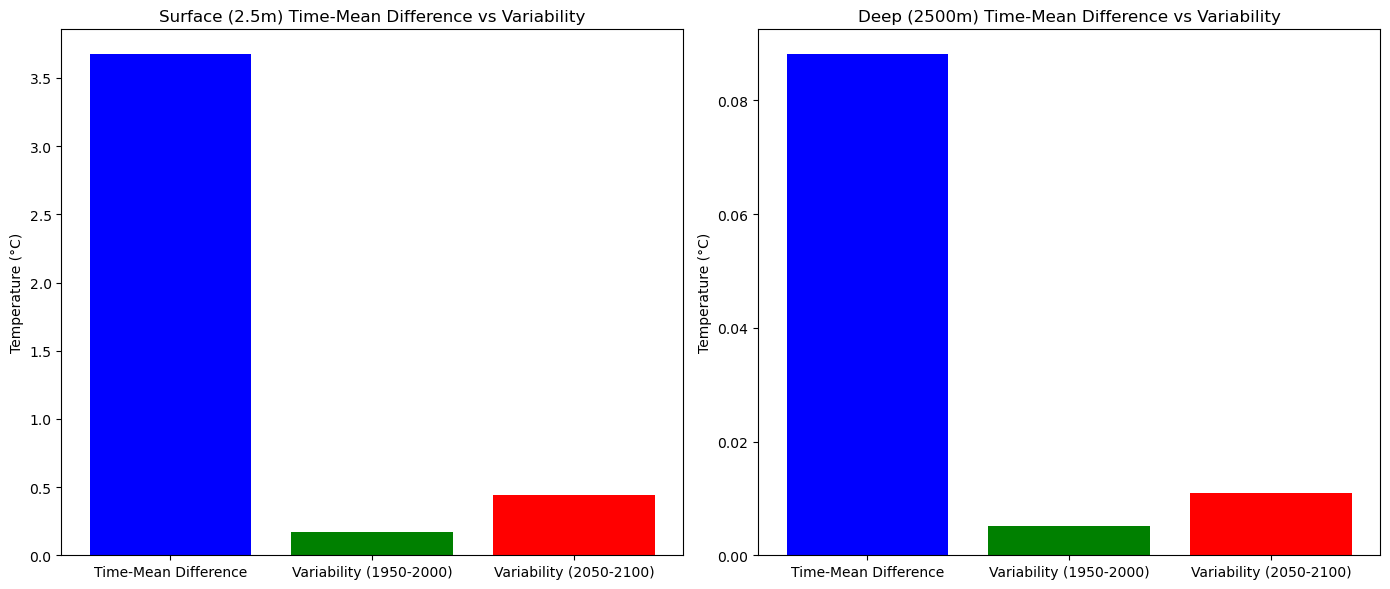

In [97]:
# Step 4: Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Surface Temperature Plot
axes[0].bar(['Time-Mean Difference', 'Variability (1950-2000)', 'Variability (2050-2100)'],
            [sfc_diff_mean.values, sfc_var_hist_annual.values, sfc_var_fut_annual.values],
            color=['blue', 'green', 'red'])
axes[0].set_title('Surface (2.5m) Time-Mean Difference vs Variability')
axes[0].set_ylabel('Temperature (°C)')

# Deep Temperature Plot
axes[1].bar(['Time-Mean Difference', 'Variability (1950-2000)', 'Variability (2050-2100)'],
            [deep_diff_mean.values, deep_var_hist_annual.values, deep_var_fut_annual.values],
            color=['blue', 'green', 'red'])
axes[1].set_title('Deep (2500m) Time-Mean Difference vs Variability')
axes[1].set_ylabel('Temperature (°C)')

# Adjust layout and show
plt.tight_layout()
plt.show()

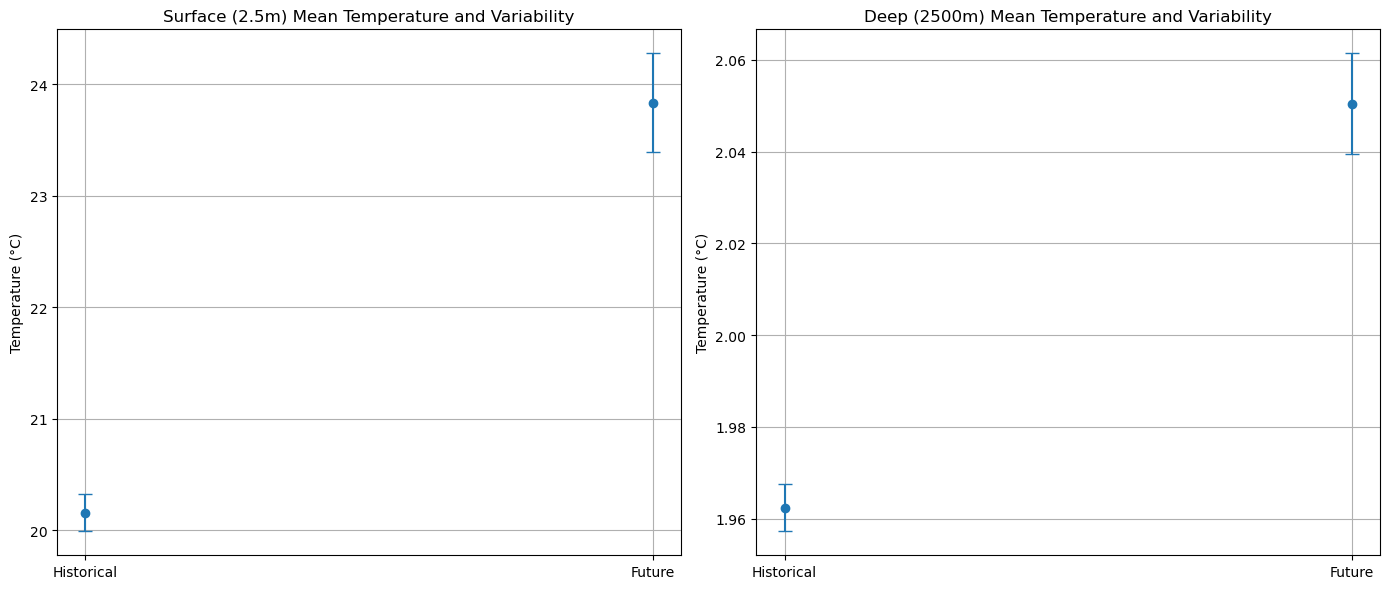

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Surface Layer
axes[0].errorbar(['Historical', 'Future'],
                 [sfc_1950_2000.mean(), sfc_2050_2100.mean()],
                 yerr=[sfc_var_hist_annual, sfc_var_fut_annual],
                 fmt='o', capsize=5, label='Surface (2.5m)')
axes[0].set_title('Surface (2.5m) Mean Temperature and Variability')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid()

# Deep Layer
axes[1].errorbar(['Historical', 'Future'],
                 [deep_1950_2000.mean(), deep_2050_2100.mean()],
                 yerr=[deep_var_hist_annual, deep_var_fut_annual],
                 fmt='o', capsize=5, label='Deep (2500m)')
axes[1].set_title('Deep (2500m) Mean Temperature and Variability')
axes[1].set_ylabel('Temperature (°C)')
axes[1].grid()

plt.tight_layout()
plt.show()

### C) Year-to-year Variability Comparison (line plot)

**1) First, Group by month and calculate standard deviation** 

In [22]:
yearly_sfc_1970_2000 = sfc_1970_2000.groupby('time.year').std()
yearly_sfc_2070_2100 = sfc_2070_2100.groupby('time.year').std()
yearly_deep_1970_2000 = deep_1970_2000.groupby('time.year').std()
yearly_deep_2070_2100 = deep_2070_2100.groupby('time.year').std()


**2) Last, make a visualization for year to year variability comparison using a line plot:**

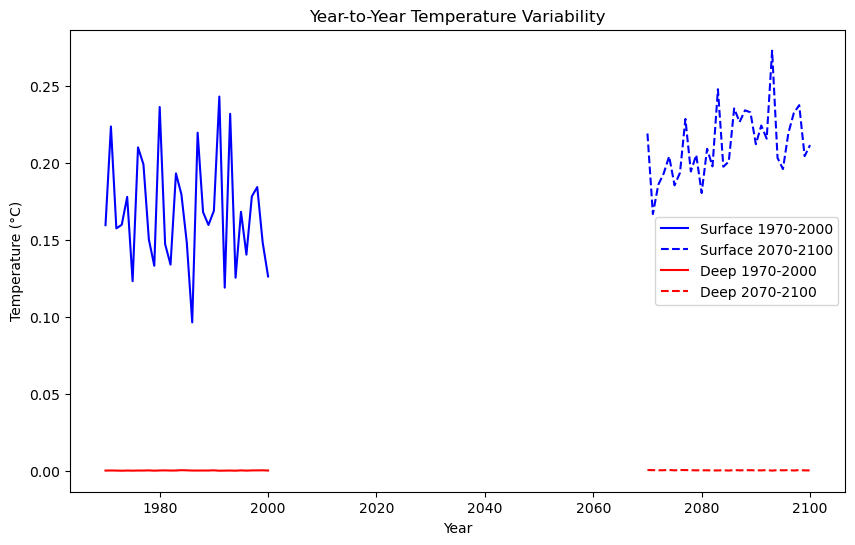

In [23]:
# Plotting setup(create a figure with specified dimensions)
plt.figure(figsize=(10, 6))


plt.plot(yearly_sfc_1970_2000.year, yearly_sfc_1970_2000, 'b-', label='Surface 1970-2000')
plt.plot(yearly_sfc_2070_2100.year, yearly_sfc_2070_2100, 'b--', label='Surface 2070-2100')
plt.plot(yearly_deep_1970_2000.year, yearly_deep_1970_2000, 'r-', label='Deep 1970-2000')
plt.plot(yearly_deep_2070_2100.year, yearly_deep_2070_2100, 'r--', label='Deep 2070-2100')

#Remaining lines add plot title, axis labels, and legend.
plt.title('Year-to-Year Temperature Variability')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

Brief descriptions of each code block:

Time-mean calculation: Computes average temperature over entire periods to show overall warming.
Annual cycle: Groups data by month to reveal seasonal patterns and their changes.
Year-to-year variability: Groups by year to show long-term trends and interannual variations.

---

## Task 2
**For the same time periods, determine if the difference in time-mean temperature is statistically significant for the inter-annual variability for each level.**

## Task 2
**For the same two time periods, produce 2-dimensional (latitude-longitude) maps
showing the difference in time-mean temperature, indicating where this difference is
statistically significant with respect to the inter-annual (annual mean) variability.**

In [24]:
from scipy.stats import ttest_ind #

In [25]:
 # Perform t-tests using previously computed inter-annual variability
# Compare yearly mean temperatures 
# First for surface (2.5m) depth, between the two periods 
t_stat_sfc, p_val_sfc = ttest_ind( # Test if the difference in time-mean temperatures between periods is statistically significant
    yearly_sfc_1970_2000, yearly_sfc_2070_2100, equal_var=False #'equal_var=False' accounts for unequal variances
)

# Then, the same goes to deep level (2500m) depth between the two periods
t_stat_deep, p_val_deep = ttest_ind(
    yearly_deep_1970_2000, yearly_deep_2070_2100, equal_var=False
)

**2) Print results:**

In [26]:
# Display the t-statistic(size of the difference) and p-value(probability of observing this difference) for surface level (2.5m).
print("Surface Level (2.5m):")
print(f"T-statistic: {t_stat_sfc:.2f}, P-value: {p_val_sfc:.2e}")
print("Statistically Significant?", "Yes" if p_val_sfc < 0.05 else "No") # If p-value < 0.05, the result is statistically significant, rejecting the null hypothesis

# Display the t-statistic and p-value for deep level (2500m).
print("\nDeep Level (2500m):")
print(f"T-statistic: {t_stat_deep:.2f}, P-value: {p_val_deep:.2e}")
print("Statistically Significant?", "Yes" if p_val_deep < 0.05 else "No")

Surface Level (2.5m):
T-statistic: -5.60, P-value: 9.88e-07
Statistically Significant? Yes

Deep Level (2500m):
T-statistic: -6.62, P-value: 1.27e-08
Statistically Significant? Yes


**2) Last, make a visualization using a box plot:**

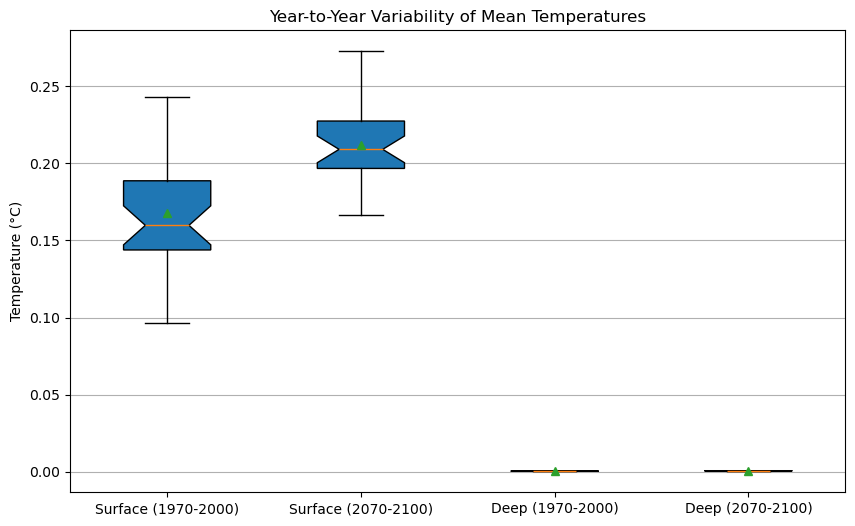

In [27]:
plt.figure(figsize=(10, 6)) # Set up the figure size
plt.boxplot([yearly_sfc_1970_2000, yearly_sfc_2070_2100, yearly_deep_1970_2000, yearly_deep_2070_2100],
labels=["Surface (1970-2000)", "Surface (2070-2100)", "Deep (1970-2000)", "Deep (2070-2100)"],
notch=True, patch_artist=True, showmeans=True) # Adds notches to the sides of the box, fills with color, and displays a dot for the mean value inside each box.
plt.title("Year-to-Year Variability of Mean Temperatures")
plt.ylabel("Temperature (°C)")
plt.grid(axis='y')
plt.show()


---

## Task 3
**Are differences in mean temperature larger for the northern hemisphere summer months (June, July & August) or winter months (December, January, February), for each level?**
- I analyze the annual cycle data to compute mean temperature differences and provide a comparison

**1) Extract Summer and Winter Data:**

In [37]:
# We explicitly define summer and winter months to represent northern hemisphere seasons.
summer_months = [6, 7, 8] # selects data for June, July, and August
winter_months = [12, 1, 2] # selects data for December, January, and February.


**2) Calculate the difference in mean temperatures for both periods, seasons and levels:**

In [40]:
# Compute summer and winter means for surface level
# First, I select data for the months = [6, 7, 8] from the sfc/deep_monthly datasets, which represents monthly means for the levels
# Then, I subtract the historical mean from the future mean to compute the temperature difference for each season.


summer_sfc_diff = (
    sfc_monthly_2070_2100.sel(month=summer_months).mean(dim='month') - sfc_monthly_1970_2000.sel(month=summer_months).mean(dim='month')
).values
winter_sfc_diff = (
    sfc_monthly_2070_2100.sel(month=winter_months).mean(dim='month') - sfc_monthly_1970_2000.sel(month=winter_months).mean(dim='month')
).values


# Compute summer and winter means for deep level
summer_deep_diff = (
    deep_monthly_2070_2100.sel(month=summer_months).mean(dim='month') - deep_monthly_1970_2000.sel(month=summer_months).mean(dim='month')
).values
winter_deep_diff = (
    deep_monthly_2070_2100.sel(month=winter_months).mean(dim='month') - deep_monthly_1970_2000.sel(month=winter_months).mean(dim='month')
).values


**3) Print Results:**

In [41]:
# Display the computed temperature differences for each season and level, allowing a direct comparison of summer and winter impacts.
print("Northern Hemisphere Temperature Differences (Future - Historical):")
print(f"Surface Level (2.5m) - Summer: {summer_sfc_diff:.2f}°C, Winter: {winter_sfc_diff:.2f}°C")
print(f"Deep Level (2500m) - Summer: {summer_deep_diff:.2f}°C, Winter: {winter_deep_diff:.2f}°C")


Northern Hemisphere Temperature Differences (Future - Historical):
Surface Level (2.5m) - Summer: 2.97°C, Winter: 2.68°C
Deep Level (2500m) - Summer: 0.14°C, Winter: 0.14°C


**4) Last, make a visualization using bar plot:**


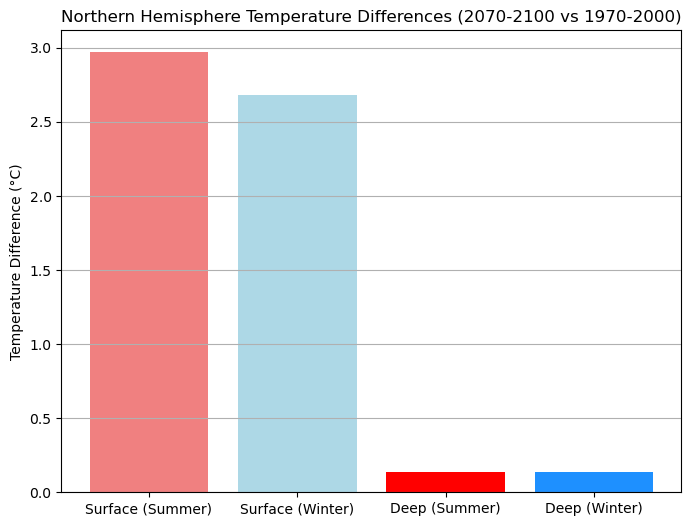

In [42]:
# Visualization: Bar Chart for Summer vs Winter Differences
labels = ['Surface (Summer)', 'Surface (Winter)', 'Deep (Summer)', 'Deep (Winter)']
differences = [
    summer_sfc_diff, winter_sfc_diff,
    summer_deep_diff, winter_deep_diff
]

plt.figure(figsize=(8, 6))
plt.bar(labels, differences, color=[ 'lightcoral', 'lightblue', 'red', 'dodgerblue'])
plt.title("Northern Hemisphere Temperature Differences (2070-2100 vs 1970-2000)")
plt.ylabel("Temperature Difference (°C)")
plt.grid(axis='y')
plt.show()


## Key Findings:

Yes, the differences in mean temperature are **larger** for Northern Hemisphere **summer months** (June, July, August) compared to **winter months** (December, January, February) at the **surface level (2.5m)**.

- **Summer Temperature Difference**: 2.97°C
- **Winter Temperature Difference**: 2.68°C

For the **deep level (2500m)**, the temperature differences are identical for both summer and winter:

- **Summer and Winter Temperature Difference**: 0.14°C

This indicates **no seasonal preference** in temperature changes at this depth. 

Thus, **larger differences in mean temperature** for summer occur **only at the surface level**, while **deep levels show no seasonal variation**.


---

## Task 4
**After removal of the annual cycle, are there significant trends in the area-weighted
spatial average temperatures for each time period and each level?**
